<a href="https://colab.research.google.com/github/BoKna031/AnimeRecommendationSystem/blob/master/ARSContentBased.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os

DATASET_FOLDER = os.sep + 'content'+ os.sep +'drive'+ os.sep +'MyDrive'+ os.sep +'Colab Notebooks'+ os.sep +'dataset'
GENERATED_FOLDER = DATASET_FOLDER + os.sep + 'generated'

RATING_CSV_PATH = GENERATED_FOLDER + os.sep + 'rating.csv'
ANIME_CSV_PATH = GENERATED_FOLDER + os.sep + 'anime.csv'
ANIME_SERIES_CSV_PATH = GENERATED_FOLDER + os.sep + 'anime_series.csv'
ANIME_WITH_TAGS_CSV_PATH = DATASET_FOLDER + os.sep + 'anime_with_tags.csv'
RECOMMENDATION_CSV_PATH = GENERATED_FOLDER + os.sep + 'recommendation.csv'
IDENTICAL_TAGS_MANUALY_EDIT_CSV_PATH = DATASET_FOLDER + os.sep + 'identical_tags_manualy_edit.csv'

# Cleaning Tags data


In [ ]:
anime_with_tags_df = pd.read_csv(ANIME_WITH_TAGS_CSV_PATH)

In [ ]:
anime_with_tags_df.head()

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,NaN,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk...","Koyoharu Gotouge : Original Creator, Haruo Sot..."
1,2,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0,NaN,'The final arc of Fruits Basket.',"Emotional Abuse,, Mature Themes,, Physical Abu...","Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum...","Natsuki Takaya : Original Creator, Yoshihide I..."
2,3,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12.0,B.C MAY PICTURES,NaN,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021.0,NaN,'The third season of Mo Dao Zu Shi.',NaN,Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang...","Mo Xiang Tong Xiu : Original Creator, Xiong Ke..."
3,4,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,Bones,Spring,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0,2010.0,"""The foundation of alchemy is based on the law...","Animal Abuse,, Mature Themes,, Violence,, Dome...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ...","Hiromu Arakawa : Original Creator, Yasuhiro Ir..."
4,5,Attack on Titan 3rd Season: Part II,Shingeki no Kyojin Season 3: Part II,TV,10.0,WIT Studio,Spring,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019.0,NaN,'The battle to retake Wall Maria begins now! W...,"Cannibalism,, Explicit Violence","Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu...","Hajime Isayama : Original Creator, Tetsurou Ar..."


In [ ]:
anime_with_tags_df['Tags'] = anime_with_tags_df['Tags'].str.split(', ')


In [ ]:
import numpy as np
unique_tags = anime_with_tags_df['Tags'].explode().unique().astype(str)
np.sort(unique_tags, kind="quicksort")

array(['15th Century', '16th Century', '17th Century', '18th Century',
       '19th Century', 'Abstract', 'Acting', 'Action', 'Adult Couples',
       'Adult Industry', 'Adventure', 'Africa', 'Afterlife', 'Age Gap',
       'Age Transformation', 'Aging', 'Agriculture', 'Alcohol',
       'Alice in Wonderland', 'Aliens', 'All-Boys School',
       'All-Girls School', 'America', 'Amnesia', 'Amusement Park',
       'Ancient China', 'Androids', 'Androphobia', 'Angels',
       'Animal Abuse,', 'Animal Characteristics', 'Animal Protagonists',
       'Animal Transformation', 'Anime Bancho', 'Anime Industry',
       'Anime Tamago', 'Anime no Chikara', 'Anime no Me', 'Animeism',
       'Anthropomorphic', 'Apartment Life', 'Apocalypse',
       'Apprenticeship', 'Archery', 'Arranged Marriage', 'Art',
       'Art School', 'Assassins', 'Astronauts', 'Astronomy', 'Australia',
       'Autobiographies', 'Aviation', 'BDSM', 'BL', 'Badminton', 'Baking',
       'Ballet Dancing', 'Bar', 'Baseball', 'Based on 

In the list of different tags, we can see that certain duplicates of the form appear, e.g 'Bullying' and 'Bullying,' , 'Cannibalism' and 'Cannibalism,', ...
We should find all really identical pairs of strings and group them together.
For that we will use Levenshtein distance algorithm

In [ ]:
!pip install fuzzywuzzy python-Levenshtein
from fuzzywuzzy import fuzz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 23.5 MB/s eta 0:00:00


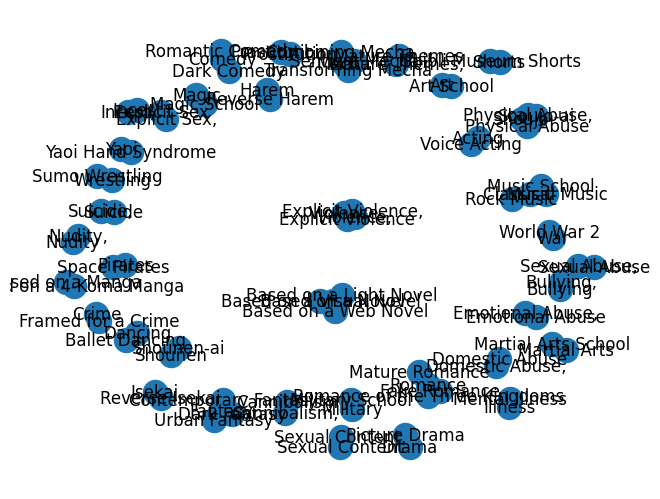

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.Graph()
for i in range(len(unique_tags)):
    for j in range(i+1, len(unique_tags)):
        if fuzz.token_set_ratio(unique_tags[i], unique_tags[j]) > 99:
            graph.add_edge(unique_tags[i], unique_tags[j])
nx.draw(graph, with_labels=True)
plt.show()

For every group of similar tags we will create record in csv file. The user needs to access the saved file and edit it manually.
The idea is that the column *Names* is used to store all the aliases of the corresponding group, and the column *GroupNames* contains the keyword that will represent the real value.

In [ ]:
closedGroups = list(nx.connected_components(graph))


identical_tags_df = pd.DataFrame({'Names:': closedGroups})
IDENTICAL_TAGS_CSV_PATH = GENERATED_FOLDER + os.sep + 'identical_tags.csv'
identical_tags_df.to_csv(IDENTICAL_TAGS_CSV_PATH)
identical_tags_df

,Names:
0,"{Fantasy, Contemporary Fantasy, Dark Fantasy, ..."
1,"{Shounen, Shounen-ai}"
2,"{Martial Arts School, Martial Arts}"
3,"{Based on a 4-Koma Manga, Based on a Manga}"
4,"{Violence,, Explicit Violence,, Explicit Viole..."
5,"{Drama, Picture Drama}"
6,"{Romance of the Three Kingdoms, Fake Romance, ..."
7,"{Shoujo-ai, Shoujo}"
8,"{Mental Illness, Illness}"
9,"{Emotional Abuse,, Emotional Abuse}"


In [ ]:
len(unique_tags)

550

In [ ]:
identical_tags_manually_df = pd.read_csv(IDENTICAL_TAGS_MANUALY_EDIT_CSV_PATH, index_col=0)
identical_tags_manually_df = identical_tags_manually_df[identical_tags_manually_df['GroupName:'].notna()]
identical_tags_manually_df

,Names:,GroupName:
0,"{'Violence,', 'Violence'}",Violence
4,"{'Explicit Violence', 'Explicit Violence,'}",Explicit Violence
9,"{'Emotional Abuse,', 'Emotional Abuse'}",Emotional Abuse
10,"{'Mature Themes,', 'Mature Themes'}",Mature Themes
11,"{'Physical Abuse', 'Physical Abuse,'}",Physical Abuse
12,"{'Suicide,', 'Suicide'}",Suicide
13,"{'Domestic Abuse', 'Domestic Abuse,'}",Domestic Abuse
16,"{'Cannibalism', 'Cannibalism,'}",Cannibalism
19,"{'Bullying,', 'Bullying'}",Bullying
24,"{'Prostitution,', 'Prostitution'}",Prostitution


In [ ]:
index = [0, 4,10, 12, 16, 19]
identical_tags_manually_df.loc[index]

,Names:,GroupName:
0,"{'Violence,', 'Violence'}",Violence
4,"{'Explicit Violence', 'Explicit Violence,'}",Explicit Violence
10,"{'Mature Themes,', 'Mature Themes'}",Mature Themes
12,"{'Suicide,', 'Suicide'}",Suicide
16,"{'Cannibalism', 'Cannibalism,'}",Cannibalism
19,"{'Bullying,', 'Bullying'}",Bullying


In [ ]:
identical_tags_manually_df['Names:'] = identical_tags_manually_df['Names:'].apply(lambda x: set(x.strip('{}').split(', ')))

In [ ]:
identical_tags_manually_df

,Names:,GroupName:
0,"{'Violence,', 'Violence'}",Violence
4,"{'Explicit Violence,', 'Explicit Violence'}",Explicit Violence
9,"{'Emotional Abuse,', 'Emotional Abuse'}",Emotional Abuse
10,"{'Mature Themes,', 'Mature Themes'}",Mature Themes
11,"{'Physical Abuse', 'Physical Abuse,'}",Physical Abuse
12,"{'Suicide', 'Suicide,'}",Suicide
13,"{'Domestic Abuse', 'Domestic Abuse,'}",Domestic Abuse
16,"{'Cannibalism', 'Cannibalism,'}",Cannibalism
19,"{'Bullying', 'Bullying,'}",Bullying
24,"{'Prostitution,', 'Prostitution'}",Prostitution


In [ ]:
identical_tags_dict = {}
for i, row in identical_tags_manually_df.iterrows():
  for t in row['Names:']:
    identical_tags_dict[t.strip('\'')] = row['GroupName:']
identical_tags_dict

{'Violence,': 'Violence',
 'Violence': 'Violence',
 'Explicit Violence,': 'Explicit Violence',
 'Explicit Violence': 'Explicit Violence',
 'Emotional Abuse,': 'Emotional Abuse',
 'Emotional Abuse': 'Emotional Abuse',
 'Mature Themes,': 'Mature Themes',
 'Mature Themes': 'Mature Themes',
 'Physical Abuse': 'Physical Abuse',
 'Physical Abuse,': 'Physical Abuse',
 'Suicide': 'Suicide',
 'Suicide,': 'Suicide',
 'Domestic Abuse': 'Domestic Abuse',
 'Domestic Abuse,': 'Domestic Abuse',
 'Cannibalism': 'Cannibalism',
 'Cannibalism,': 'Cannibalism',
 'Bullying': 'Bullying',
 'Bullying,': 'Bullying',
 'Prostitution,': 'Prostitution',
 'Prostitution': 'Prostitution',
 'Sexual Abuse': 'Sexual Abuse',
 'Sexual Abuse,': 'Sexual Abuse',
 'Nudity': 'Nudity',
 'Nudity,': 'Nudity',
 'Sexual Content,': 'Sexual Content',
 'Sexual Content': 'Sexual Content',
 'Explicit Sex,': 'Explicit Sex',
 'Explicit Sex': 'Explicit Sex',
 'Incest,': 'Incest',
 'Incest': 'Incest'}

Now when we detected all duplicates for tags and created dictionary we need to change every record of duplicated tag as unique value

In [ ]:
def cleanTags(lst):
  result = []
  if(type(lst) != list):
    return []
  for it in lst:
    if it in identical_tags_dict.keys():
      result.append(identical_tags_dict[it])
    else:
      result.append(it)
  return result

In [ ]:
anime_with_tags_df['Tags'] = anime_with_tags_df['Tags'].apply(lambda x: cleanTags(x))

In [ ]:
unique_tags = anime_with_tags_df['Tags'].explode().unique().astype(str)
len(unique_tags)

535

Now when we compare amount of unique tags we can see that we have 535 from previous 550 and that is right amount because we detected 15 duplicates

# Merging anime from different dataframes

In [ ]:
anime_df = pd.read_csv(ANIME_CSV_PATH)
anime_df.head()

,MAL_ID,Name,English name,Japanese name,Type,Genres,Producers,Studios,Episodes,Ranked,Popularity,Popularity.1,Score
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,TV,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",Bandai Visual,Sunrise,26,28.0,39,39,8.78
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,"['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']","Sunrise, Bandai Visual",Bones,1,159.0,518,518,8.39
2,6,Trigun,Trigun,トライガン,TV,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",Victor Entertainment,Madhouse,26,266.0,201,201,8.24
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,"['Action', 'Mystery', 'Police', 'Supernatural'...","TV Tokyo, Bandai Visual, Dentsu, Victor Entert...",Sunrise,26,2481.0,1467,1467,7.27
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,TV,"['Adventure', 'Fantasy', 'Shounen', 'Supernatu...","TV Tokyo, Dentsu",Toei Animation,52,3710.0,4369,4369,6.98


In [ ]:
anime_df['normalized_title'] = anime_df['Name'].str.lower().replace('[^\w\s]','').replace('\s+', ' ', regex=True)
anime_with_tags_df['normalized_title'] = anime_with_tags_df['Name'].str.lower().replace('[^\w\s]','').replace('\s+', ' ', regex=True)
anime_df['normalized_english_title'] = anime_df['English name'].str.lower().replace('[^\w\s]','').replace('\s+', ' ', regex=True)

In [ ]:
anime_df.head()

,MAL_ID,Name,English name,Japanese name,Type,Genres,Producers,Studios,Episodes,Ranked,Popularity,Popularity.1,Score,normalized_title,normalized_english_title
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,TV,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",Bandai Visual,Sunrise,26,28.0,39,39,8.78,cowboy bebop,cowboy bebop
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,"['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']","Sunrise, Bandai Visual",Bones,1,159.0,518,518,8.39,cowboy bebop: tengoku no tobira,cowboy bebop:the movie
2,6,Trigun,Trigun,トライガン,TV,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",Victor Entertainment,Madhouse,26,266.0,201,201,8.24,trigun,trigun
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,"['Action', 'Mystery', 'Police', 'Supernatural'...","TV Tokyo, Bandai Visual, Dentsu, Victor Entert...",Sunrise,26,2481.0,1467,1467,7.27,witch hunter robin,witch hunter robin
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,TV,"['Adventure', 'Fantasy', 'Shounen', 'Supernatu...","TV Tokyo, Dentsu",Toei Animation,52,3710.0,4369,4369,6.98,bouken ou beet,beet the vandel buster


In [ ]:
import math
import re
from collections import Counter

def jaccard_sim(s1, s2):
    a = set(re.compile(r'\w+').findall(s1))
    b = set(re.compile(r'\w+').findall(s2))

    c = a.intersection(b)

    return float(len(c)) / (len(a) + len(b) - len(c))

In [ ]:
s1 = "Attack on Titan"
s2 = "Attack on Titans"
ratio = fuzz.token_set_ratio(s1, s2)
print(ratio)
print(jaccard_sim(s1,s2))

97
0.5


In [ ]:
# A is short for 'anime'
A_INDEX = 0
A_NORMALIZED_TITLE = -2
A_NORMALIZED_ENGLISH_TITLE = -1

#AWS is short for 'anime with title'
AWT_INDEX = 0
AWT_NORMALIZED_TITLE = -1
#anime_with_tags_lst[0][AWT_NORMALIZED_TITLE]

In [ ]:
num_anime = anime_df.shape[0]
#anime_slice =  anime_df.head(50).copy()
anime_df_lst = anime_df.values.tolist()
anime_with_tags_lst = anime_with_tags_df.values.tolist()
prog_inc = num_anime // 10

for i, a1 in enumerate(anime_df_lst):
    best_match_ratio = 0
    best_match_index = None
    best_mathc_df_index = None
    for j, a2 in enumerate(anime_with_tags_lst):
        ratio = max(fuzz.token_set_ratio(a1[A_NORMALIZED_TITLE], a2[AWT_NORMALIZED_TITLE]), fuzz.token_set_ratio(a1[A_NORMALIZED_ENGLISH_TITLE], a2[AWT_NORMALIZED_TITLE]))
        if ratio >= 90 and ratio > best_match_ratio:
            best_match_ratio = ratio
            best_match_index = j
            best_mathc_df_index = a2[AWT_INDEX]
            if ratio == 100:
              break
    if best_mathc_df_index is not None:
        #print("anime: " + str(a1[A_INDEX]), " | best_mathc_df_index: " + str(best_mathc_df_index))
        anime_df.at[i, 'anime_with_tags_index'] = best_mathc_df_index
    if i % prog_inc == 0:
        print(i // prog_inc * 10, '%')

0 %
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %


In [ ]:
anime_df

,MAL_ID,Name,English name,Japanese name,Type,Genres,Producers,Studios,Episodes,Ranked,Popularity,Popularity.1,Score,normalized_title,normalized_english_title,anime_with_tags_index
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,TV,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",Bandai Visual,Sunrise,26,28.0,39,39,8.78,cowboy bebop,cowboy bebop,90.0
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,"['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']","Sunrise, Bandai Visual",Bones,1,159.0,518,518,8.39,cowboy bebop: tengoku no tobira,cowboy bebop:the movie,90.0
2,6,Trigun,Trigun,トライガン,TV,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",Victor Entertainment,Madhouse,26,266.0,201,201,8.24,trigun,trigun,349.0
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,"['Action', 'Mystery', 'Police', 'Supernatural'...","TV Tokyo, Bandai Visual, Dentsu, Victor Entert...",Sunrise,26,2481.0,1467,1467,7.27,witch hunter robin,witch hunter robin,3676.0
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,TV,"['Adventure', 'Fantasy', 'Shounen', 'Supernatu...","TV Tokyo, Dentsu",Toei Animation,52,3710.0,4369,4369,6.98,bouken ou beet,beet the vandel buster,6853.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16146,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,盗墓笔记之秦岭神树,ONA,"['Adventure', 'Mystery', 'Supernatural']",Unknown,Unknown,Unknown,Unknown,13116,13116,Unknown,daomu biji zhi qinling shen shu,unknown,2214.0
16147,48483,Mieruko-chan,Unknown,見える子ちゃん,TV,"['Comedy', 'Horror', 'Supernatural']",Kadokawa,Passione,Unknown,Unknown,17562,17562,Unknown,mieruko-chan,unknown,1372.0
16148,48488,Higurashi no Naku Koro ni Sotsu,Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,"['Mystery', 'Dementia', 'Horror', 'Psychologic...",Unknown,Unknown,Unknown,Unknown,17558,17558,Unknown,higurashi no naku koro ni sotsu,higurashi:when they cry – sotsu,812.0
16149,48491,Yama no Susume: Next Summit,Unknown,ヤマノススメ Next Summit,TV,"['Adventure', 'Slice of Life', 'Comedy']",Kadokawa,8bit,Unknown,Unknown,17565,17565,Unknown,yama no susume: next summit,unknown,2214.0


In [ ]:
anime_df.loc[anime_df['MAL_ID'] == 7]

,MAL_ID,Name,English name,Japanese name,Type,Genres,Producers,Studios,Episodes,Ranked,Popularity,Popularity.1,Score,normalized_title,normalized_english_title,anime_with_tags_index
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,"['Action', 'Mystery', 'Police', 'Supernatural'...","TV Tokyo, Bandai Visual, Dentsu, Victor Entert...",Sunrise,26,2481.0,1467,1467,7.27,witch hunter robin,witch hunter robin,3676.0


In [ ]:
anime_with_tags_df.loc[anime_with_tags_df['Rank'] == 91]

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff,normalized_title
90,91,Hotarubi no Mori e,To the Forest of Firefly Lights,Movie,NaN,Brain's Base,NaN,"[Drama, Romance, Shoujo, Coming of Age, Forest...",4.36,2011.0,NaN,"""While visiting her uncle for the summer, six ...",NaN,Hotarubi no Mori e,NaN,"Gin : Kouki Uchiyama, Hotaru Takegawa : Ayane ...","Yuki Midorikawa : Original Creator, Takahiro O...",hotarubi no mori e


In [ ]:
#anime_df['anime_with_tags_index'] = anime_df['anime_with_tags_index'].astype(int)
anime_df.to_csv(ANIME_CSV_PATH)

# Movies similarity

In this part we should compare every rated movies of user and all recommendation animes from collaborative layer

In [ ]:
anime_df = pd.read_csv(ANIME_CSV_PATH, index_col=0)
anime_df.head()

,MAL_ID,Name,English name,Japanese name,Type,Genres,Producers,Studios,Episodes,Ranked,Popularity,Popularity.1,Score,normalized_title,normalized_english_title,anime_with_tags_index
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,TV,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",Bandai Visual,Sunrise,26,28.0,39,39,8.78,cowboy bebop,cowboy bebop,90.0
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,"['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']","Sunrise, Bandai Visual",Bones,1,159.0,518,518,8.39,cowboy bebop: tengoku no tobira,cowboy bebop:the movie,90.0
2,6,Trigun,Trigun,トライガン,TV,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",Victor Entertainment,Madhouse,26,266.0,201,201,8.24,trigun,trigun,349.0
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,"['Action', 'Mystery', 'Police', 'Supernatural'...","TV Tokyo, Bandai Visual, Dentsu, Victor Entert...",Sunrise,26,2481.0,1467,1467,7.27,witch hunter robin,witch hunter robin,3676.0
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,TV,"['Adventure', 'Fantasy', 'Shounen', 'Supernatu...","TV Tokyo, Dentsu",Toei Animation,52,3710.0,4369,4369,6.98,bouken ou beet,beet the vandel buster,6853.0


In [ ]:
anime_df['anime_with_tags_index'].isnull().sum()

272

In [ ]:
anime_df['anime_with_tags_index'].fillna(-1, inplace=True)
anime_df['anime_with_tags_index'] = anime_df['anime_with_tags_index'].astype(int)

Adding information about tags from other database so we have all neccessary data in one dataframe. We will create columns 'Tags' and 'Normalized Tags'


In [ ]:
import re

def clean_string(s):
    # Zamena svakog karaktera koji nije slovo ili broj razmakom
    if type(s) is float:
      print(s)
    if s is None:
      return s
    s = re.sub(r'[^\w\s]', ' ', s)
    # Uklanjanje višestrukih razmaka
    s = re.sub(r'\s+', ' ', s)
    s = s.strip()
    s = s.replace(' ', '_')
    s = s.lower()
    return s

In [ ]:
def clear_list(lst):
  result = []
  if type(lst) is float:
    return []
  for it in lst:
    result.append(clean_string(it))
  return result

In [ ]:
anime_df['Tags'] = anime_df['anime_with_tags_index'].map(anime_with_tags_df['Tags'])
anime_df['Normalized Tags'] = anime_df['Tags'].apply(lambda x: clear_list(x))
anime_df.head()

,MAL_ID,Name,English name,Japanese name,Type,Genres,Producers,Studios,Episodes,Ranked,Popularity,Popularity.1,Score,normalized_title,normalized_english_title,anime_with_tags_index,Tags,Normalized Tags
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,TV,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",Bandai Visual,Sunrise,26,28.0,39,39,8.78,cowboy bebop,cowboy bebop,90,"[Drama, Romance, Shoujo, Coming of Age, Forest...","[drama, romance, shoujo, coming_of_age, forest..."
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,"['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']","Sunrise, Bandai Visual",Bones,1,159.0,518,518,8.39,cowboy bebop: tengoku no tobira,cowboy bebop:the movie,90,"[Drama, Romance, Shoujo, Coming of Age, Forest...","[drama, romance, shoujo, coming_of_age, forest..."
2,6,Trigun,Trigun,トライガン,TV,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",Victor Entertainment,Madhouse,26,266.0,201,201,8.24,trigun,trigun,349,"[Action, Comedy, Sci Fi, Hacking, Social Media...","[action, comedy, sci_fi, hacking, social_media..."
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,"['Action', 'Mystery', 'Police', 'Supernatural'...","TV Tokyo, Bandai Visual, Dentsu, Victor Entert...",Sunrise,26,2481.0,1467,1467,7.27,witch hunter robin,witch hunter robin,3676,"[Chinese Animation, Family Friendly]","[chinese_animation, family_friendly]"
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,TV,"['Adventure', 'Fantasy', 'Shounen', 'Supernatu...","TV Tokyo, Dentsu",Toei Animation,52,3710.0,4369,4369,6.98,bouken ou beet,beet the vandel buster,6853,"[Sci Fi, Cyberpunk, Dystopia, Noir, Psychologi...","[sci_fi, cyberpunk, dystopia, noir, psychologi..."


For now we will focus on user with id 53698 because we use that user for collaborative filtering

In [ ]:
user_id = 53698
recommendation_df = pd.read_csv(RECOMMENDATION_CSV_PATH, index_col=0)
#recommendation_df = recommendation_df[recommendation_df['user_id'] == user_id]

In [ ]:
recommendation_df

,MAL_ID,Name,Estimation
0,820,Ginga Eiyuu Densetsu,9.594884
1,199,Sen to Chihiro no Kamikakushi,9.517046
2,918,Gintama,9.444418
3,6594,Katanagatari,9.254977
4,431,Howl no Ugoku Shiro,9.215057
5,11979,Mahou Shoujo Madoka★Magica Movie 2: Eien no Mo...,9.085566
6,263,Hajime no Ippo,9.032332
7,164,Mononoke Hime,9.021596
8,1453,Maison Ikkoku,8.996126
9,232,Cardcaptor Sakura,8.981206


We only working with animes that is rated by user. Ignoring information if user is watched anime, but not rated it.

In [ ]:
rating_df = pd.read_csv(RATING_CSV_PATH)
not_rated_anime_index = rating_df[(rating_df['rating'] == -1)].index
rating_df = rating_df.drop(not_rated_anime_index)

We're only separating rated anime since those are the only ones we're interested in right now

In [ ]:
list_of_rated_movies = rating_df.loc[rating_df['user_id'] == user_id, 'anime_id'].tolist()
rated_animes_df = anime_df.loc[anime_df['MAL_ID'].isin(list_of_rated_movies)].copy()

Now we combine informations about rated animes and ratings of user for that anime to have everything on one place

In [ ]:
user_ratings = rating_df.loc[rating_df['user_id'] == user_id]
anime_ratings_df = pd.merge(rated_animes_df, user_ratings, left_on = 'MAL_ID', right_on='anime_id')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')

In [ ]:
columns = ['MAL_ID','Normalized Tags']
recommendation_df = anime_df.loc[anime_df['MAL_ID'].isin(recommendation_df['MAL_ID'])].copy()
recommendation_df = recommendation_df[columns]
recommendation_df['Normalized Tags'] = recommendation_df['Normalized Tags'].apply(' '.join)

tfidf_matrix = tfidf.fit_transform(recommendation_df['Normalized Tags'])

In [ ]:
anime_ratings_df = anime_ratings_df[columns].copy()
anime_ratings_df['Normalized Tags'] = anime_ratings_df['Normalized Tags'].apply(' '.join)

anime_tfidf = tfidf.transform(anime_ratings_df['Normalized Tags'])


In [ ]:
similarity_scores = cosine_similarity(tfidf_matrix, anime_tfidf)

In [ ]:
def similarity_calculation(index):
  higest_similarity_index = similarity_scores[index].argsort()[::-1][0]
  higest_similarity_score = similarity_scores[index][higest_similarity_index]
  return higest_similarity_score

In [ ]:
recommendation_df = recommendation_df.reset_index(drop=True)
recommendation_df['Similarity'] = recommendation_df.index.map(similarity_calculation)

In [ ]:
for i in range(similarity_scores.shape[0]):
  higest_similarity_index = similarity_scores[i].argsort()[::-1][0]
  higest_similarity_score = similarity_scores[i][higest_similarity_index]
  print("Za anime sa MAL_ID: ", recommendation_df.iloc[i]['MAL_ID'], " najslicniji je anime sa MAL_ID: ", anime_ratings_df.iloc[higest_similarity_index]['MAL_ID'], " sa skorom od ",higest_similarity_score)

Za anime sa MAL_ID:  122  najslicniji je anime sa MAL_ID:  1996  sa skorom od  1.0
Za anime sa MAL_ID:  164  najslicniji je anime sa MAL_ID:  164  sa skorom od  1.0
Za anime sa MAL_ID:  199  najslicniji je anime sa MAL_ID:  199  sa skorom od  1.0000000000000004
Za anime sa MAL_ID:  232  najslicniji je anime sa MAL_ID:  232  sa skorom od  1.0
Za anime sa MAL_ID:  237  najslicniji je anime sa MAL_ID:  28121  sa skorom od  0.8439793059195708
Za anime sa MAL_ID:  263  najslicniji je anime sa MAL_ID:  10080  sa skorom od  0.8417158458562984
Za anime sa MAL_ID:  302  najslicniji je anime sa MAL_ID:  6709  sa skorom od  0.8628189337346737
Za anime sa MAL_ID:  372  najslicniji je anime sa MAL_ID:  1078  sa skorom od  1.0000000000000002
Za anime sa MAL_ID:  392  najslicniji je anime sa MAL_ID:  392  sa skorom od  1.0000000000000002
Za anime sa MAL_ID:  431  najslicniji je anime sa MAL_ID:  431  sa skorom od  1.0
Za anime sa MAL_ID:  457  najslicniji je anime sa MAL_ID:  6421  sa skorom od  0.81

In [ ]:
recommendation_df

,MAL_ID,Normalized Tags,Similarity
0,122,idols music showbiz based_on_a_card_game,1.000000
1,164,shounen sports basketball school_club tourname...,1.000000
2,199,action adventure fantasy shounen cheats demons...,1.000000
3,232,action comedy fantasy slice_of_life contempora...,1.000000
4,237,action fantasy chinese_animation cultivation m...,0.843979
5,263,mecha sci_fi conspiracy mind_games overpowered...,0.841716
6,302,comedy shounen slice_of_life gag school_life b...,0.862819
7,372,slice_of_life animal_protagonists anthropomorp...,1.000000
8,392,action adventure drama fantasy romance feudal_...,1.000000
9,431,drama fantasy shoujo bodyguards cats countrysi...,1.000000


In [ ]:
orig_recommendation_df = pd.read_csv(RECOMMENDATION_CSV_PATH, index_col=0)
orig_recommendation_df['Similarity'] = orig_recommendation_df['MAL_ID'].apply

,MAL_ID,Name,Estimation
0,820,Ginga Eiyuu Densetsu,9.594884
1,199,Sen to Chihiro no Kamikakushi,9.517046
2,918,Gintama,9.444418
3,6594,Katanagatari,9.254977
4,431,Howl no Ugoku Shiro,9.215057
5,11979,Mahou Shoujo Madoka★Magica Movie 2: Eien no Mo...,9.085566
6,263,Hajime no Ippo,9.032332
7,164,Mononoke Hime,9.021596
8,1453,Maison Ikkoku,8.996126
9,232,Cardcaptor Sakura,8.981206


In [ ]:
df_merged = pd.merge(orig_recommendation_df, recommendation_df[['MAL_ID', 'Similarity']], on='MAL_ID', how='left')
df_merged

,MAL_ID,Name,Estimation,Similarity
0,820,Ginga Eiyuu Densetsu,9.594884,0.694365
1,199,Sen to Chihiro no Kamikakushi,9.517046,1.000000
2,918,Gintama,9.444418,0.614572
3,6594,Katanagatari,9.254977,1.000000
4,431,Howl no Ugoku Shiro,9.215057,1.000000
5,11979,Mahou Shoujo Madoka★Magica Movie 2: Eien no Mo...,9.085566,1.000000
6,263,Hajime no Ippo,9.032332,0.841716
7,164,Mononoke Hime,9.021596,1.000000
8,1453,Maison Ikkoku,8.996126,0.505286
9,232,Cardcaptor Sakura,8.981206,1.000000


In [ ]:
df_merged.to_csv(RECOMMENDATION_CSV_PATH)

In [ ]:
recommendation_df = pd.read_csv(RECOMMENDATION_CSV_PATH, index_col=0)

In [ ]:
recommendation_df[['MAL_ID','Similarity']]